<a href="https://colab.research.google.com/github/jahidulislam114593/SMS_SpamDetectionWith_NaiveBayes_LogisticRegression_SVM-_MLL/blob/main/SMS_Spam_Detection_with_Naive_Bayes%2C_Logistic_Regression%2C_SVM__MLL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SMS Spam Detection with Naive Bayes dataset/spam.csv", encoding='latin1')
df = df[['v1', 'v2']]  # Selecting only necessary columns
df.columns = ['label', 'message']  # Renaming columns for clarity

In [ ]:
df.head(50)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [ ]:
# Check for missing values
print("Missing values in each column:\n", df.isnull().sum())

Missing values in each column:
 label      0
message    0
dtype: int64


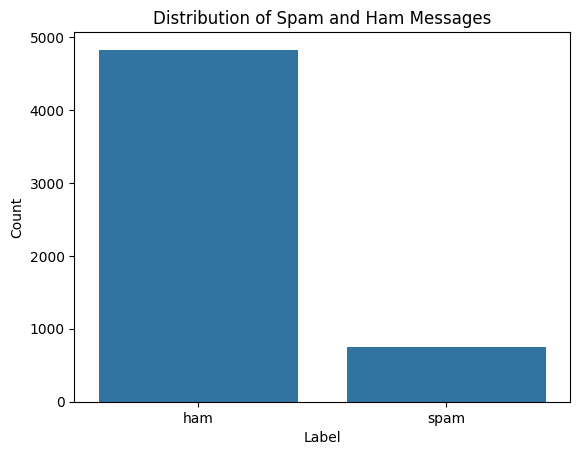

In [ ]:
# Visualize class distribution
sns.countplot(x='label', data=df)
plt.title('Distribution of Spam and Ham Messages')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [ ]:
# Encode labels and prepare data
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['message'])
y = df['label']

In [ ]:
# Step 2: Handle Class Imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
print("Class distribution after SMOTE:\n", pd.Series(y_resampled).value_counts())

Class distribution after SMOTE:
 label
0    4825
1    4825
Name: count, dtype: int64


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [ ]:
# Step 3: Implement Multiple Machine Learning Models
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(kernel='linear')
}

# Dictionary to store accuracy of each model
results = {}

In [ ]:
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy

    # Print evaluation metrics for each model
    print(f"\n{model_name} Model Evaluation")
    print("Accuracy:", accuracy)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))



Naive Bayes Model Evaluation
Accuracy: 0.9740932642487047
Confusion Matrix:
 [[975  10]
 [ 40 905]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       985
           1       0.99      0.96      0.97       945

    accuracy                           0.97      1930
   macro avg       0.97      0.97      0.97      1930
weighted avg       0.97      0.97      0.97      1930


Logistic Regression Model Evaluation
Accuracy: 0.9689119170984456
Confusion Matrix:
 [[940  45]
 [ 15 930]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97       985
           1       0.95      0.98      0.97       945

    accuracy                           0.97      1930
   macro avg       0.97      0.97      0.97      1930
weighted avg       0.97      0.97      0.97      1930


SVM Model Evaluation
Accuracy: 0.9621761658031088
Confusion Matrix:
 [[932  53]
 [ 20 9

In [ ]:
# Step 4: Cross-Validation for Evaluation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = {}

for model_name, model in models.items():
    # Perform cross-validation and store results
    cv_score = cross_val_score(model, X_resampled, y_resampled, cv=kfold, scoring='accuracy')
    cv_results[model_name] = cv_score
    print(f"\n{model_name} Cross-Validation Accuracy: {cv_score.mean():.4f} ± {cv_score.std():.4f}")



Naive Bayes Cross-Validation Accuracy: 0.9027 ± 0.0053

Logistic Regression Cross-Validation Accuracy: 0.9629 ± 0.0042


In [ ]:
# Step 5: Regularization for Overfitting Control in Logistic Regression
# Using a regularized logistic regression model to avoid overfitting
regularized_logistic_regression = LogisticRegression(C=0.1, max_iter=1000)  # C is the inverse of regularization strength
regularized_logistic_regression.fit(X_train, y_train)
y_pred_lr = regularized_logistic_regression.predict(X_test)

print("\nRegularized Logistic Regression Model Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))


Regularized Logistic Regression Model Evaluation
Accuracy: 0.9632124352331606
Confusion Matrix:
 [[935  50]
 [ 21 924]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96       985
           1       0.95      0.98      0.96       945

    accuracy                           0.96      1930
   macro avg       0.96      0.96      0.96      1930
weighted avg       0.96      0.96      0.96      1930

